In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
sys.path.append('/Users/ivan_zorin/Documents/DEV/code/ntl/')

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import darts

from ntl.data import get_dataset

In [72]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import (
    Scaler,
    MissingValuesFiller,
    Mapper,
    InvertibleMapper,
)
from darts.dataprocessing import Pipeline
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.timeseries_generation import linear_timeseries
from darts.datasets import MonthlyMilkDataset, MonthlyMilkIncompleteDataset

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [22]:
from darts.timeseries import TimeSeries

In [13]:
data_path = '/Users/ivan_zorin/Documents/DEV/data/sgcc/data.csv'
dataset = get_dataset(data_path)

In [20]:
norm = dataset[dataset['FLAG'] == 0].drop('FLAG', axis=1)
anomal = dataset[dataset['FLAG'] == 1].drop('FLAG', axis=1)

In [65]:
norm = norm.reset_index().melt(id_vars=['CONS_NO'], var_name='date', value_name='cons')
anomal = anomal.reset_index().melt(id_vars=['CONS_NO'], var_name='date', value_name='cons')

In [66]:
norm_ts = TimeSeries.from_group_dataframe(norm, group_cols='CONS_NO', time_col='date', value_cols='cons', freq='d')
anomal_ts = TimeSeries.from_group_dataframe(anomal, group_cols='CONS_NO', time_col='date', value_cols='cons', freq='d')


<Axes: xlabel='date'>

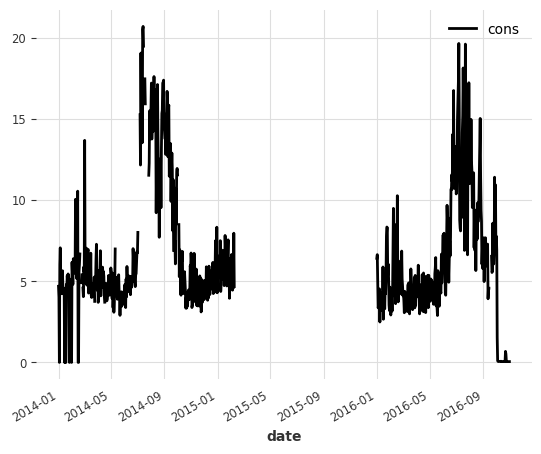

In [71]:
norm_ts[3].plot()

In [89]:
scaler = Scaler(verbose=True, n_jobs=-1)
norm_scaled = scaler.fit_transform(norm_ts)

Fitting (Scaler):   0%|          | 0/38757 [00:00<?, ?it/s]

/Users/ivan_zorin/opt/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/ivan_zorin/opt/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/Users/ivan_zorin/opt/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/ivan_zorin/opt/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Transform (Scaler):   0%|          | 0/38757 [00:00<?, ?it/s]

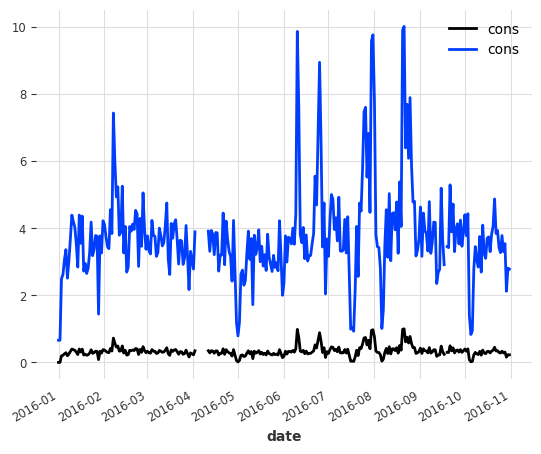

In [91]:
idx = 0
for t in [norm_scaled[idx], norm_ts[idx]]:
    t.plot()

In [95]:
from darts.ad.scorers.difference_scorer import DifferenceScorer
from darts.dataprocessing.transformers.missing_values_filler import MissingValuesFiller

In [96]:
filler = MissingValuesFiller(fill='auto', n_jobs=-1)

In [99]:
norm_ts_filled = filler.transform(norm_ts, method='linear')
anomal_ts_filled = filler.transform(anomal_ts, method='linear')


In [139]:
norm_ts_filled[0].values()[mask.squeeze()]

array([[0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66      ],
       [0.66 

ValueError: Inferred frequency None from passed values does not conform to passed frequency D

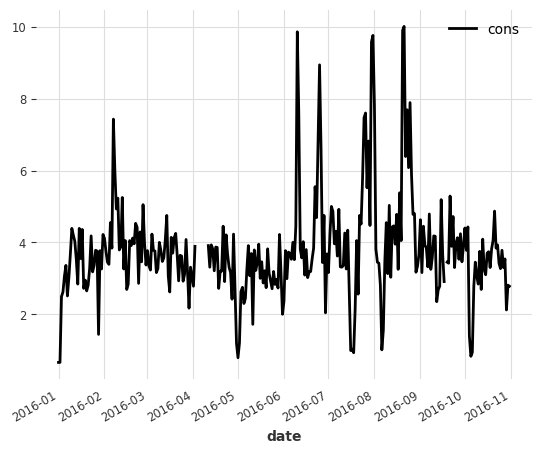

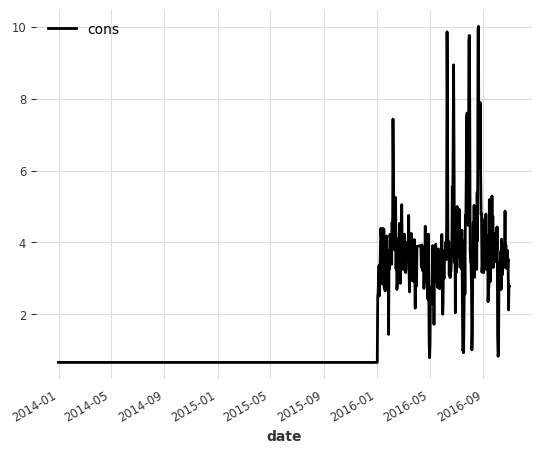

In [119]:
plt.figure()
norm_ts[0].plot()
plt.show()

plt.figure()
norm_ts_filled[0]..plot()
plt.show()

(1035, 1)

In [127]:
norm_ts[0][]

<TimeSeries (DataArray) (date: 1, component: 1, sample: 1)>
array([[[nan]]])
Coordinates:
  * date       (date) datetime64[ns] 2014-01-01
  * component  (component) object 'cons'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  static_covariates                           CONS_NO\n...
    hierarchy:          None